In [15]:
import tensorflow
from tensorflow import keras
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [4]:
housing = fetch_california_housing()

In [12]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [35]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

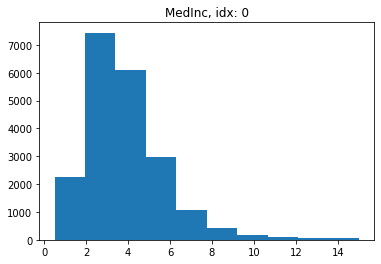

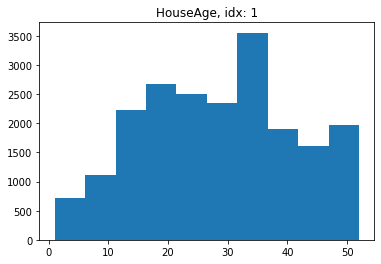

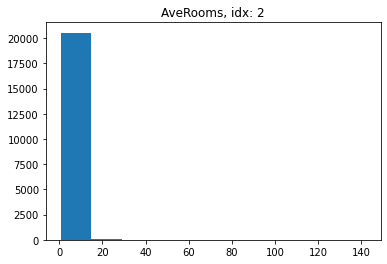

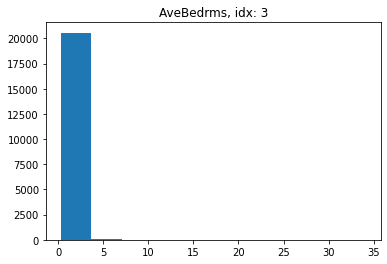

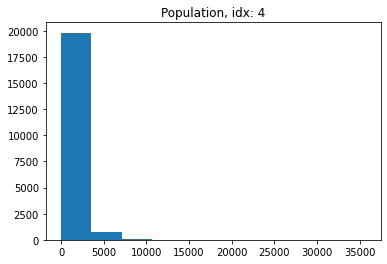

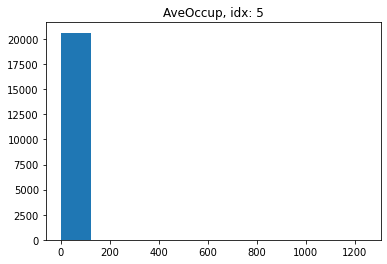

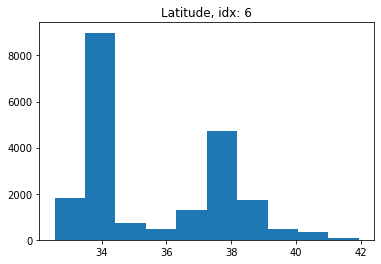

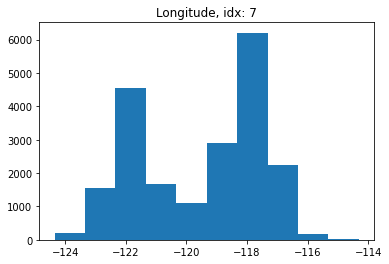

In [37]:
for idx in range(housing["data"].shape[1]):
    plt.hist(housing["data"][:,idx])
    plt.title(f'{housing["feature_names"][idx]}, idx: {idx}')
    plt.show()

## Lat Lng
The graphs above look bimodal, so I think there are two major population centres, probabaly SF and LA. I will confirm this by finding the cluster centroids with KMeans where K=2

First, lets look at lat vs lng

Actually, I was incorrect, what I was seeing above is correlation. I want to draw lines across the two modes for each variable

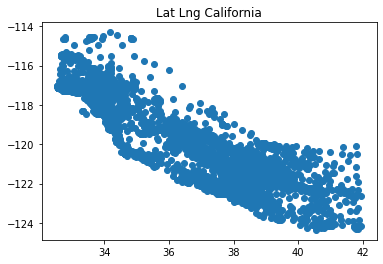

In [17]:
lat = housing["data"][:,6]
lng = housing["data"][:,7]

plt.scatter(lat, lng)
plt.title("Lat Lng California")

plt.show()

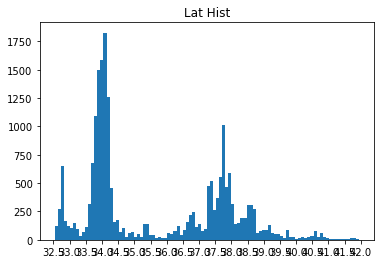

<Figure size 720x720 with 0 Axes>

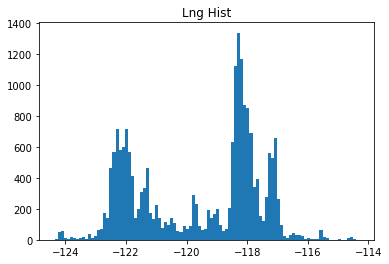

In [33]:

plt.hist(lat, bins=100)
plt.title("Lat Hist")
plt.locator_params(axis="x", nbins=30)
plt.figure(figsize=(10,10))
plt.show()
plt.hist(lng, bins=100)
plt.title("Lng Hist")
plt.xticks()
plt.show()

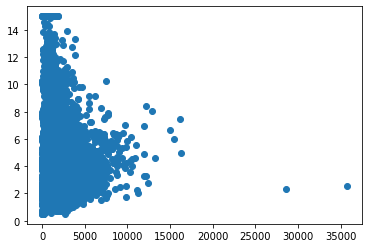

In [39]:
plt.scatter(housing["data"][:,4], housing["data"][:,0])